In [1]:
import pandas as pd
import seaborn as sns 

In [2]:
wine_red=pd.read_csv('winequality-red.csv', sep=';')

In [3]:
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_red.shape

(1599, 12)

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

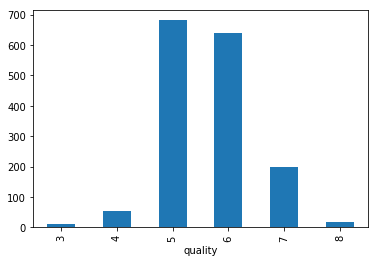

In [6]:
quality = wine_red.groupby('quality')
quality.size().plot(kind='bar')

In [7]:
correlation = wine_red.corr()

In [8]:
correlation.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907


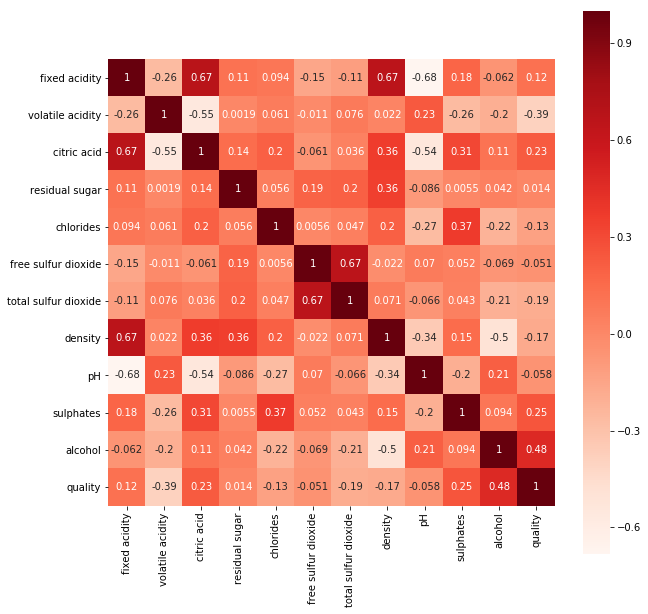

In [9]:
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Reds')

In [10]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [11]:
x = wine_red[features]
y = wine_red['quality']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [13]:
from sklearn import preprocessing

In [14]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
x_train_scaled

array([[ 0.51358886,  2.19680282, -0.164433  , ...,  1.08415147,
        -0.69866131, -0.58608178],
       [-1.73698885, -0.31792985, -0.82867679, ...,  1.46964764,
         1.2491516 ,  2.97009781],
       [-0.35201795,  0.46443143, -0.47100705, ..., -0.13658641,
        -0.35492962, -0.20843439],
       ..., 
       [-0.98679628,  1.10708533, -0.93086814, ...,  0.24890976,
        -0.98510439,  0.35803669],
       [-0.69826067,  0.46443143, -1.28853787, ...,  1.08415147,
        -0.35492962, -0.68049363],
       [ 3.1104093 , -0.62528606,  2.08377675, ..., -1.61432173,
         0.79084268, -0.39725809]])

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logistic = LogisticRegression()

In [18]:
logistic.fit(x_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
confidence = logistic.score(x_test_scaled, y_test)
print("\nThe confidence score:\n")
print(confidence)



The confidence score:

0.575


In [20]:
y_true, y_pred =  y_test, logistic.predict(x_test_scaled)


In [21]:
results_df = y_true.to_frame().reset_index()

results_df.assign(predicted_quality=y_pred)

,index,quality,predicted_quality
0,797,7,6
1,871,5,6
2,1333,5,5
3,1463,6,6
4,1058,7,6
5,1130,6,6
6,1037,5,5
7,735,5,5
8,1560,5,5
9,1224,6,6
